# CUSTOMER PERSONALITY ANALYSIS

## IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## LOADING THE DATASET

In [57]:
df =pd.read_excel('marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [36]:
# Obtain information about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Age                  2240 non-null   int32         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2240 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntWines             2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [5]:
# check for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 missing values found in the Income column


In [6]:
# Fill the missing values with the mean value of the income
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

The missing values were cleaned so there are no missing value found in the dataset

In [37]:
# Check for duplicated values
df.duplicated().sum()

0

There are no duplicated values found in the dataset

In [9]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [38]:
# Statistical analysis on numerical data
df.describe()

,ID,Year_Birth,Age,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968-10-21 16:33:51.428571432,55.194196,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893-01-01 00:00:00,28.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959-01-01 00:00:00,47.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970-01-01 00:00:00,54.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977-01-01 00:00:00,65.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996-01-01 00:00:00,131.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,NaN,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [39]:
from datetime import datetime

# Convert the 'Year_Birth' column to datetime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')

# Calculate the age based on the current year
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth'].dt.year

print(df)

         ID Year_Birth  Age   Education Marital_Status   Income  Kidhome  \
0      5524 1957-01-01   67  Graduation         Single  58138.0        0   
1      2174 1954-01-01   70  Graduation         Single  46344.0        1   
2      4141 1965-01-01   59  Graduation       Together  71613.0        0   
3      6182 1984-01-01   40  Graduation       Together  26646.0        1   
4      5324 1981-01-01   43         PhD        Married  58293.0        1   
...     ...        ...  ...         ...            ...      ...      ...   
2235  10870 1967-01-01   57  Graduation        Married  61223.0        0   
2236   4001 1946-01-01   78         PhD       Together  64014.0        2   
2237   7270 1981-01-01   43  Graduation       Divorced  56981.0        0   
2238   8235 1956-01-01   68      Master       Together  69245.0        0   
2239   9405 1954-01-01   70         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  ...  AcceptedCmp3  AcceptedCmp4  \
0            0 

I converted the Year_birth column to datetime format in order to get the current ages of each of the customers in order to be able to carry out the analysis

In [12]:
# Define the index of the column where you want to insert the 'Age' column
insert_index = 2  # Insert it at index 2

# Insert the 'Age' column at the specified index
df.insert(insert_index, 'Age', df.pop('Age'))

# Display the DataFrame with the new columns
print(df)

         ID Year_Birth  Age   Education Marital_Status   Income  Kidhome  \
0      5524 1957-01-01   67  Graduation         Single  58138.0        0   
1      2174 1954-01-01   70  Graduation         Single  46344.0        1   
2      4141 1965-01-01   59  Graduation       Together  71613.0        0   
3      6182 1984-01-01   40  Graduation       Together  26646.0        1   
4      5324 1981-01-01   43         PhD        Married  58293.0        1   
...     ...        ...  ...         ...            ...      ...      ...   
2235  10870 1967-01-01   57  Graduation        Married  61223.0        0   
2236   4001 1946-01-01   78         PhD       Together  64014.0        2   
2237   7270 1981-01-01   43  Graduation       Divorced  56981.0        0   
2238   8235 1956-01-01   68      Master       Together  69245.0        0   
2239   9405 1954-01-01   70         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  AcceptedCmp3  \
0         

In [13]:
# Is Income affected by the ages of customers?
df.groupby('Age')['Income'].mean()

Age
28     10960.500000
29     60937.000000
30     85449.333333
31     74139.800000
32     47830.153846
33     60900.333333
34     40919.277778
35     42583.408378
36     47947.758621
37     46888.666667
38     43558.339318
39     39192.937500
40     39132.789474
41     48097.601223
42     52674.094475
43     47032.160291
44     49927.025641
45     44956.528302
46     46093.405862
47     62653.038462
48     47539.213483
49     52417.132530
50     48338.898551
51     47355.601388
52     51137.560144
53     49388.152314
54     52392.110425
55     51220.299315
56     48597.450980
57     53782.431818
58     50960.460000
59     55668.662162
60     56373.267889
61     48892.116697
62     60988.954545
63     57024.562538
64     54817.632653
65     56244.142183
66     58483.778327
67     53937.802389
68     56706.600000
69     57501.903089
70     58500.765027
71     57810.000000
72     56903.673077
73     55912.587241
74     50197.172414
75     61547.200000
76     65405.047619
77     66327.562

In [14]:
df1= df.groupby('Age')['Income'].mean()
df1

Age
28     10960.500000
29     60937.000000
30     85449.333333
31     74139.800000
32     47830.153846
33     60900.333333
34     40919.277778
35     42583.408378
36     47947.758621
37     46888.666667
38     43558.339318
39     39192.937500
40     39132.789474
41     48097.601223
42     52674.094475
43     47032.160291
44     49927.025641
45     44956.528302
46     46093.405862
47     62653.038462
48     47539.213483
49     52417.132530
50     48338.898551
51     47355.601388
52     51137.560144
53     49388.152314
54     52392.110425
55     51220.299315
56     48597.450980
57     53782.431818
58     50960.460000
59     55668.662162
60     56373.267889
61     48892.116697
62     60988.954545
63     57024.562538
64     54817.632653
65     56244.142183
66     58483.778327
67     53937.802389
68     56706.600000
69     57501.903089
70     58500.765027
71     57810.000000
72     56903.673077
73     55912.587241
74     50197.172414
75     61547.200000
76     65405.047619
77     66327.562

These includes all the customers ages and their various incomes

In [40]:
# Define age ranges for each generation
gen_z_age_range = (12, 24)  # Age range for Gen Z
millennials_age_range = (25, 40)  # Age range for Millennials
gen_x_age_range = (41, 56)  # Age range for Gen X
baby_boomers_age_range = (57, 75)  # Age range for Baby Boomers
silent_generation_age_range = (76, 131)  # Age range for Silent Generation

# Function to categorize age into generational groups
def categorize_generation(age):
    if age >= gen_z_age_range[0] and age <= gen_z_age_range[1]:
        return 'Gen Z'
    elif age >= millennials_age_range[0] and age <= millennials_age_range[1]:
        return 'Millennials'
    elif age >= gen_x_age_range[0] and age <= gen_x_age_range[1]:
        return 'Gen X'
    elif age >= baby_boomers_age_range[0] and age <= baby_boomers_age_range[1]:
        return 'Baby Boomers'
    else:
        return 'Silent Generation'

# Add 'Generation' column to DataFrame
df['Generation'] = df['Year_Birth'].apply(lambda x: categorize_generation(2024 - x.year))

# Group by generation and calculate counts and average income
generation_stats = df.groupby('Generation').agg({
    'Generation': 'count',
    'Income': 'mean'
}).rename(columns={'Generation': 'Total_Count', 'Income': 'Average_Income'})

# Display generation statistics
print(generation_stats)


                   Total_Count  Average_Income
Generation                                    
Baby Boomers               874    55905.999443
Gen X                     1027    49921.069878
Millennials                259    45290.148659
Silent Generation           80    64661.403142


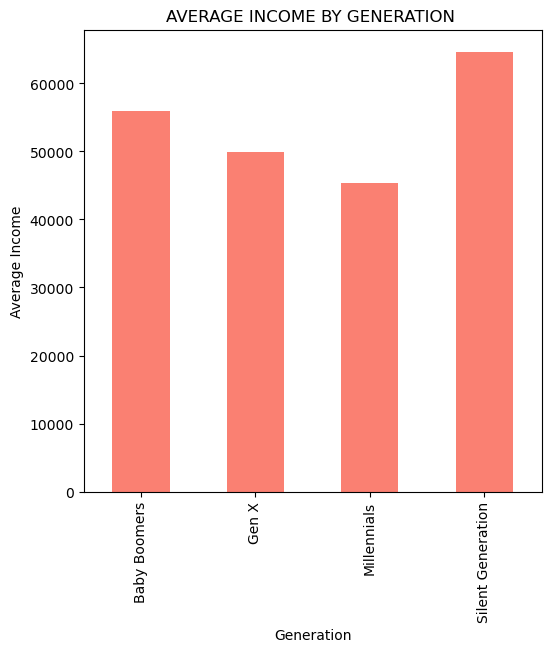

In [41]:
# Plot a bar chart to show the Average Income by Generation
plt.figure(figsize =(13,6))
plt.subplot(1,2,2)
generation_stats['Average_Income'].plot(kind= 'bar',color='salmon')
plt.title('AVERAGE INCOME BY GENERATION ')
plt.xlabel('Generation')
plt.ylabel('Average Income')
plt.show()

Customers of the Silent Generation earn an average Income of 64,661.40 while the Baby Boomers earn an average income of 55,906.0 49921.07. The Gen x Customers earn an average Income of 49,921.07 and the Millennials earn an average Income of 45,290.15. We can see here that the older you get the more income you earn. Silent Generation probably earn their income from their agricultural business or some get paid based on retirement benefits.

In [17]:
# Does Education level affect Income?
df.groupby('Education')['Income'].mean()

Education
2n Cycle      47701.378099
Basic         20306.259259
Graduation    52715.755781
Master        52908.476370
PhD           56105.210405
Name: Income, dtype: float64

In [56]:
df2=df.groupby('Education')['Income'].mean()
df2

Education
2n Cycle      47701.378099
Basic         20306.259259
Graduation    52715.755781
Master        52908.476370
PhD           56105.210405
Name: Income, dtype: float64

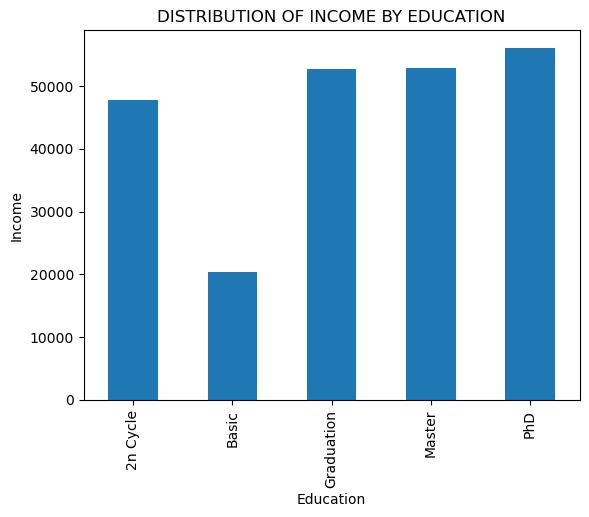

In [55]:
# Plot a bar chart to show the distribution of income by education
df2.plot
df1.plot(kind='bar', xlabel= 'Education', ylabel= 'Income')
plt.title('DISTRIBUTION OF INCOME BY EDUCATION')
plt.show()


Customers with PHD degree tends to earn more salary compared to others. Customers with basic education level earns less salary, reasons could be that they have not completed their educational qualification

In [20]:
# Does age distribution of customers vary across different educational levels and marital status?
df.groupby(['Education','Marital_Status'])['Age'].count()   

Education   Marital_Status
2n Cycle    Divorced           23
            Married            81
            Single             37
            Together           57
            Widow               5
Basic       Divorced            1
            Married            20
            Single             18
            Together           14
            Widow               1
Graduation  Absurd              1
            Alone               1
            Divorced          119
            Married           433
            Single            252
            Together          286
            Widow              35
Master      Absurd              1
            Alone               1
            Divorced           37
            Married           138
            Single             75
            Together          106
            Widow              12
PhD         Alone               1
            Divorced           52
            Married           192
            Single             98
            Together 

In [21]:
df3=df.groupby(['Education','Marital_Status'])['Age'].count()
df3

Education   Marital_Status
2n Cycle    Divorced           23
            Married            81
            Single             37
            Together           57
            Widow               5
Basic       Divorced            1
            Married            20
            Single             18
            Together           14
            Widow               1
Graduation  Absurd              1
            Alone               1
            Divorced          119
            Married           433
            Single            252
            Together          286
            Widow              35
Master      Absurd              1
            Alone               1
            Divorced           37
            Married           138
            Single             75
            Together          106
            Widow              12
PhD         Alone               1
            Divorced           52
            Married           192
            Single             98
            Together 

In [51]:
df3 = df3.reset_index()
df3 = df3.rename(columns={'Age': 'Count'})

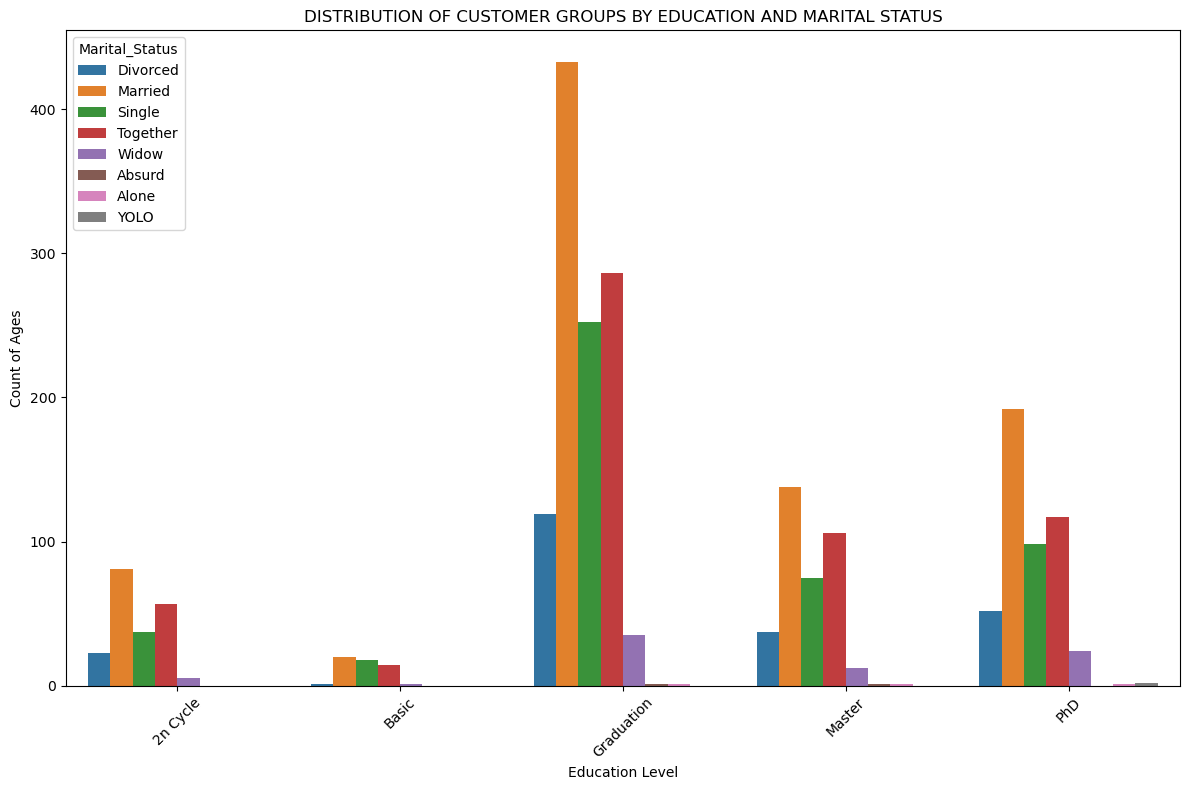

In [52]:
# Plot a barplot to show the Distribution of Customer groups by Edducation and Marital status
plt.figure(figsize=(12, 8))
sns.barplot(x='Education', y='Count', hue='Marital_Status', data=df2)
plt.title('DISTRIBUTION OF CUSTOMER GROUPS BY EDUCATION AND MARITAL STATUS')
plt.xlabel('Education Level')
plt.ylabel('Count of Ages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 

Customers who just recently graduated buys more products in the company,a total of 1,127 customers just recently graduated, A total of 486 Customers with a PhD Degree buys products in the company. It is observed that couples that just got married tends to buy more products from the company while customers who have been together for a period of time probably has children also ends to buy most products from the company, Next is those that are single then those are divorced then the widows.

In [24]:
# Which Product category is more common amongst the customers?

df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

In [49]:
df4= df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()
df4

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

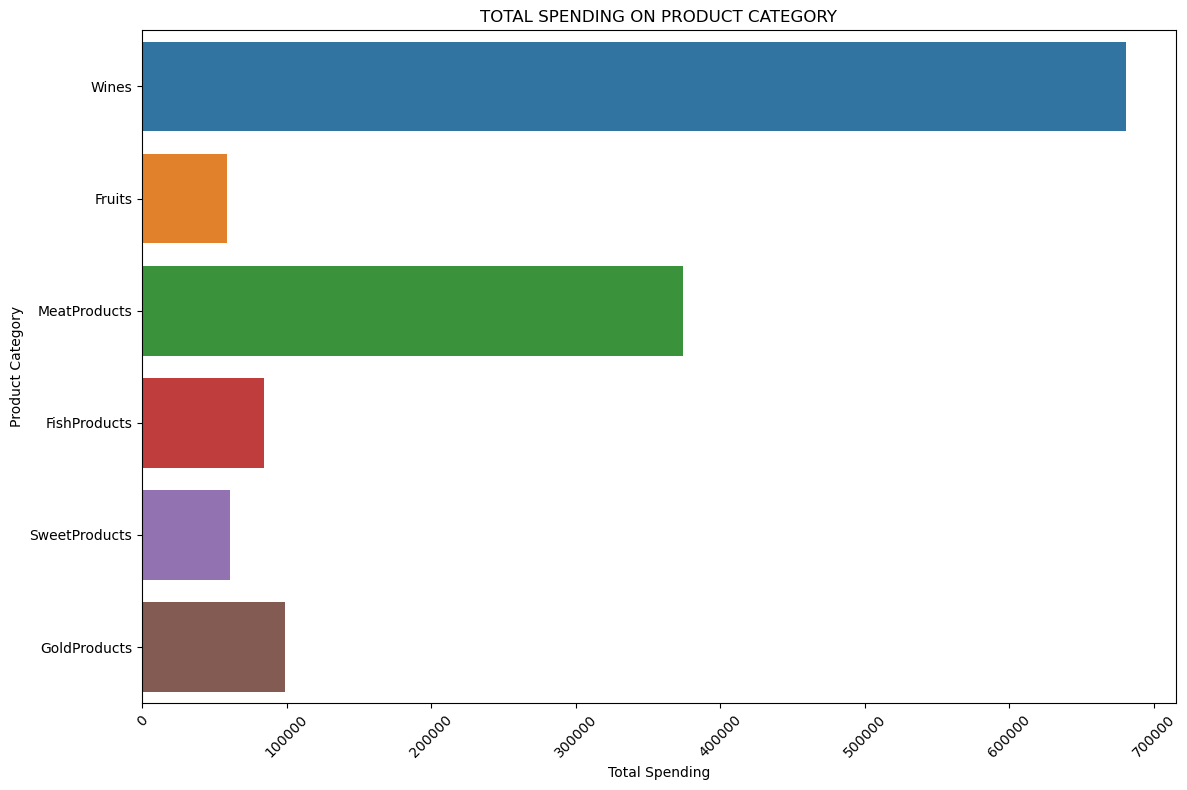

In [50]:
# Define each names of the Product Category
Product_categories= ['Wines','Fruits','MeatProducts','FishProducts','SweetProducts','GoldProducts']
# Plot a barplot to display the total spending on product category
plt.figure(figsize=(12,8))
sns.barplot(y= Product_categories  ,x= df3.values, orient= 'horizontal', data=df3)
plt.title('TOTAL SPENDING ON PRODUCT CATEGORY')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Customers spends more on Wines than any other products with a total 680,816, Customers spend a total of 373,968 dollars on Meat Products, Customers spend a total of 98,609 dollars on GoldProducts, Customers spend a total of 84,057 on Fish Products. Customers spend 60621 on Sweet products and customers spend less on Fruits.

In [27]:
# How do customer preferences for different product categories vary across demographic segments?
Product_categories= ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
Demographic_segments= ['Marital_Status','Education']
average_spending_by_demographic= df.groupby(Demographic_segments)[Product_categories].mean()
average_spending_by_demographic

MntWines   MntFruits  MntMeatProducts  \
Marital_Status Education                                             
Absurd         Graduation  471.000000  102.000000       125.000000   
               Master      240.000000   67.000000       500.000000   
Alone          Graduation    5.000000    7.000000        24.000000   
               Master      534.000000    5.000000        47.000000   
               PhD          15.000000    0.000000         8.000000   
Divorced       2n Cycle    351.173913   25.565217       150.695652   
               Basic         0.000000    1.000000         3.000000   
               Graduation  300.579832   33.016807       162.983193   
               Master      301.405405   19.675676       137.108108   
               PhD         391.653846   21.480769       132.903846   
Married        2n Cycle    154.777778   27.469136       122.654321   
               Basic        15.200000   15.450000        17.000000   
               Graduation  272.568129   29.434180       171.214781   
               Master      327.717391   20.014493       135.492754   
               PhD         430.536458   21.843750       186.041667   
Single         2n Cycle    209.945946   31.135135       177.405405   
               Basic         3.111111    9.166667         7.611111   
               Graduation  263.261905   32.714286       188.611111   
               Master      383.520000   20.573333       238.400000   
               PhD         361.928571   18.132653       156.132653   
Together       2n Cycle    188.421053   28.684211       136.649123   
               Basic         2.000000    8.714286         8.142857   
               Graduation  312.269231   29.937063       189.349650   
               Master      303.000000   23.518868       146.443396   
               PhD         391.145299   16.162393       170.256410   
Widow          2n Cycle    221.800000   55.600000       184.200000   
               Basic         3.000000    3.000000        24.000000   
               Graduation  298.657143   31.257143       197.714286   
               Master      433.750000   34.500000       227.416667   
               PhD         486.000000   31.625000       165.875000   
YOLO           PhD         322.000000    3.000000        50.000000   

                           MntFishProducts  MntSweetProducts  MntGoldProds  
Marital_Status Education                                                    
Absurd         Graduation       212.000000         61.000000    245.000000  
               Master           199.000000          0.000000    163.000000  
Alone          Graduation        19.000000         14.000000     20.000000  
               Master             0.000000          5.000000     41.000000  
               PhD                4.000000          2.000000     20.000000  
Divorced       2n Cycle          33.217391         40.521739     50.000000  
               Basic             10.000000          6.000000      9.000000  
               Graduation        37.579832         33.184874     49.067227  
               Master            29.459459         16.756757     46.891892  
               PhD               34.500000         13.750000     38.576923  
Married        2n Cycle          41.604938         29.617284     47.666667  
               Basic             27.950000         20.500000     26.750000  
               Graduation        41.381062         31.341801     49.972286  
               Master            25.615942         20.731884     37.094203  
               PhD               27.015625         19.942708     30.447917  
Single         2n Cycle          39.540541         32.189189     48.891892  
               Basic              9.777778          8.500000     19.555556  
               Graduation        45.091270         29.380952     51.138889  
               Master            39.000000         23.373333     41.173333  
               PhD               24.663265         26.377551     29.122449  
Together       2n Cycle 

<Figure size 1200x800 with 0 Axes>

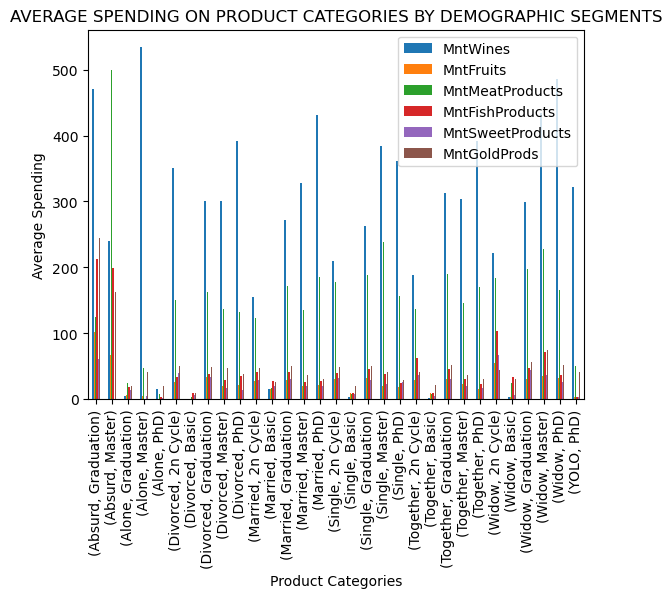

In [45]:
# Plot a bar chart to show the Average spending on Product categories by Demographic segments
plt.figure(figsize=(12,8))
average_spending_by_demographic.plot
average_spending_by_demographic.plot(kind='bar', xlabel='Product Categories',ylabel= 'Average Spending')
plt.title('AVERAGE SPENDING ON PRODUCT CATEGORIES BY DEMOGRAPHIC SEGMENTS')
plt.show()

In [30]:
# Response rate to each marketing campaign
campaign_response_rate = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()
Campaign_response= ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
print("Response Rate to Marketing Campaigns:")
print(campaign_response_rate)


Response Rate to Marketing Campaigns:
AcceptedCmp1    0.064286
AcceptedCmp2    0.013393
AcceptedCmp3    0.072768
AcceptedCmp4    0.074554
AcceptedCmp5    0.072768
dtype: float64


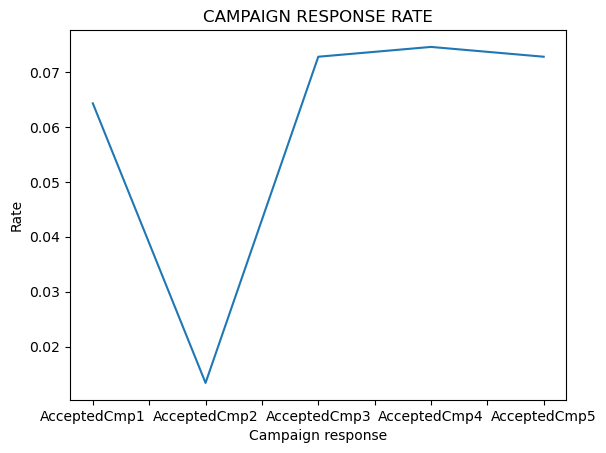

In [46]:
# Plot a line chart to show the campaign response rate
campaign_response_rate.plot
campaign_response_rate.plot(kind='line', xlabel= 'Campaign response', ylabel= 'Rate')
plt.title('CAMPAIGN RESPONSE RATE')
plt.show()

AcceptedCmp4 has the highest campaign rate with 0.074554, AcceptedCmp3 and AcceptedCmp5 has the same campaign rate of 0.072768 while AcceptedCmp2 has the least campaign rate

In [32]:
# Average number of website visits
avg_website_visits = df['NumWebVisitsMonth'].mean()

print("Average Number of Website Visits:", avg_website_visits)


Average Number of Website Visits: 5.316517857142857


The average number of website visits in a month is 5.34 which shows that customers rarely visits the company's website so probably they order from the company itself or the they call the company's phone number.

In [47]:
# Relationship between recency of purchases and number of complaints
recency_vs_complaints = df[['Recency', 'Complain']].corr()
correlation_matrix=df[['Recency', 'Complain']].corr()
# Print the result
print("Correlation between Recency of Purchases and Number of Complaints:")
print(recency_vs_complaints)


Correlation between Recency of Purchases and Number of Complaints:
           Recency  Complain
Recency   1.000000  0.013231
Complain  0.013231  1.000000


Text(0.5, 1.0, 'CORRELATION BETWEEN RECENCY OF PURCHASES AND NUMBER OF COMPLAINTS')

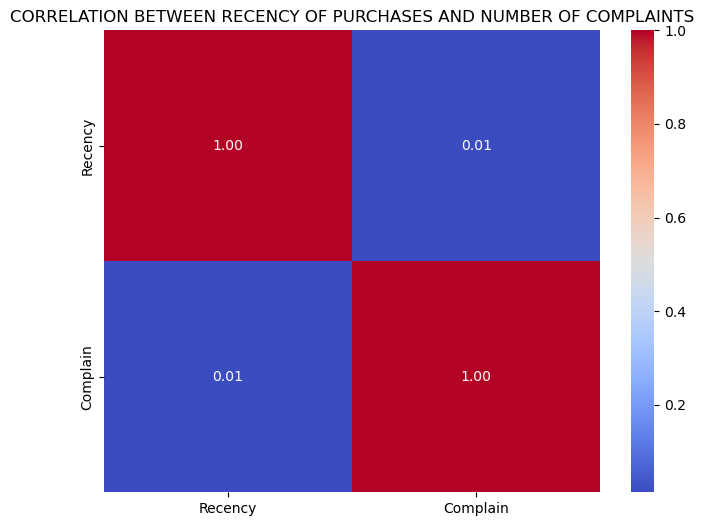

In [48]:
# Plot a heatmap to show the relationship between Recency of Purchases and Number of Complaints 
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('CORRELATION BETWEEN RECENCY OF PURCHASES AND NUMBER OF COMPLAINTS')

## GENERAL INSIGHTS

1. Customers of the Silent Generation earn the highest average Income of 64,661.40
2. Customers with PHD degree tends to earn more salary compared to others with an Income of 56105.21
3. Customers who just recently graduated buys more products in the company,a total of 1,127 customers just recently graduated
4. It is observed that couples that just got married tends to buy more products from the company
5. Customers spends more on Wines than any other products with a total 680,816.
6. 
7. AcceptedCmp4 has the highest campaign rate with 0.074554.
8. The average number of website visits in a month is 5.34 which shows that customers rarely visits the company's website so probably they order from the company itself or the they call the company's phone number.
9. 